#### CMSE 201 Final Project
### &#9989; Matthew Sitto
### &#9989; Section_005
#### &#9989; 12/03/2019

# ___Modeling the Future of Climate Change Based on Human Activity___

## Background and Motivation

_In recent years, we have all been hearing about climate change. More specifically, how humans have affected it, and what consequences come with an increase in global temperatures. Some people say that by 2050, the Earth will be doomed. Others say that we only have 12 years to correct the global warming. This leaves people all over the world wondering, what is actually true? Because of this, it is easy to see why people remain skeptical when it comes to climate change. I personally never thought about it, but I became curious after spending time working on the Great Lakes Water Level in class assignments. People are talking about how climate change is causing water levels to rise, so I wanted to investigate the root of the problem. As soon as I began working on this project, I looked up information on the leading cause of climate change and found that the main culprit is the Greenhouse Effect. This is when certain gases, known as greenhouse gases, trap heat from the sun within the Earth's atmosphere. As the concentration of greenhouse gases in the Earth's atmosphere increases, more heat will be trapped. This causes the Earth to warm, which can effect animals, crops, and is why water levels are rising. These are not the only complications either, rates of infection among humans have also been increasing due to this. After doing a bit of research, I learned that of the multiple greenhouse gases, humans may largely be responsible for a few of them. Given that climate change is a huge part of today's politics, many people have been arguing over what the best course of action is, and some have even been arguing that climate change is not real issue. Due to this, I decided that I would like to find out if climate change is worth worrying about._

_My goal begins with gathering data on human activity related greenhouse gases, since those gas concentrations are the ones that could most easily be reversed, as well as global temperature data. First I want to relate the gas concentrations to climate change effects in order to indentify if there even is a strong correlation. Once done, I will use the data to answer my question: What will global temperatures look like in the future if we continue to release greenhouse gases at our current rate? Of course, this will all be predicted so it will not be 100% accurate, but it is enough to determine whether it is an urgent issue, and if we can even do something about it._

## Methodology

_The plan to achieve my goal is straighforward. I need to first find and read in data for Earth's global temperature anomaly (relative to the global temperatures between 1951 and 1980) and specific greenhouse gas atmospheric concentrations. I do not expect any of this to come clean, so I will use Pandas dataframes to clean up the data and turn it all into a dataframe that makes sense. Then I will make plots that relate the data. I want to be able to visualize correlations between greenhouse gases and climate change. I expect there to be a positive correlation, but I want to know how impactful the cause and effect relationship is. If the correlation is weak or if climate change data does not seem significant, then that would tell me that the whole issue has been blown out of proportion. If there is a strong correlation and I can see that there are significant changes in Earth's temperature over the years, then I will know that climate change is a serious issue. If the latter option is true, then I will use regression techniques to plot the future of Earth's temperature._

In [1]:
#First, I need read in what I'll need:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
#I am going to quickly create a function that converts Celsius to Fahrenheit for later:

def temp_convert(t):
    return((t * (9/5)) + 32)

_After doing a bit of research, I found that humans are largely responsible for 3 greenhouse gases: Carbon dioxide, Nitrous oxide, and Methane. Since we have very little impact on the atmospheric concentrations of the other greenhouse gases, they will be negligible for this model. I am only interested in seeing what we are responsible for. Finding the data and creating a comprehensible dataset did prove to be challenging, especially when I could not find early data for Nitrous oxide and Methane atmospheric concentrations, but I do have enough to make a functional model._

In [3]:
#Reading in CO2 Data:
co2_emit = pd.read_csv('co2-concentration-long-term.csv')

#Reading in N2O Data:
n2o_emit = pd.read_csv('no2-concentration.csv')

#Reading in CH4 Data:
ch4_emit = pd.read_csv('ch4-concentration.csv')

#Reading in Global Temp Data:
temp = pd.read_json("""[{"Mean": 0.9363, "Source": "GCAG", "Year": 2016},{"Mean": 0.99, "Source": "GISTEMP", "Year": 2016},{"Mean": 0.8998, "Source": "GCAG", "Year": 2015},{"Mean": 0.87, "Source": "GISTEMP", "Year": 2015},{"Mean": 0.7408, "Source": "GCAG", "Year": 2014},{"Mean": 0.74, "Source": "GISTEMP", "Year": 2014},{"Mean": 0.6679, "Source": "GCAG", "Year": 2013},{"Mean": 0.65, "Source": "GISTEMP", "Year": 2013},{"Mean": 0.624, "Source": "GCAG", "Year": 2012},{"Mean": 0.63, "Source": "GISTEMP", "Year": 2012},{"Mean": 0.5788, "Source": "GCAG", "Year": 2011},{"Mean": 0.6, "Source": "GISTEMP", "Year": 2011},{"Mean": 0.7014, "Source": "GCAG", "Year": 2010},{"Mean": 0.71, "Source": "GISTEMP", "Year": 2010},{"Mean": 0.6367, "Source": "GCAG", "Year": 2009},{"Mean": 0.64, "Source": "GISTEMP", "Year": 2009},{"Mean": 0.5419, "Source": "GCAG", "Year": 2008},{"Mean": 0.54, "Source": "GISTEMP", "Year": 2008},{"Mean": 0.61, "Source": "GCAG", "Year": 2007},{"Mean": 0.66, "Source": "GISTEMP", "Year": 2007},{"Mean": 0.6125, "Source": "GCAG", "Year": 2006},{"Mean": 0.63, "Source": "GISTEMP", "Year": 2006},{"Mean": 0.6585, "Source": "GCAG", "Year": 2005},{"Mean": 0.69, "Source": "GISTEMP", "Year": 2005},{"Mean": 0.5783, "Source": "GCAG", "Year": 2004},{"Mean": 0.55, "Source": "GISTEMP", "Year": 2004},{"Mean": 0.6134, "Source": "GCAG", "Year": 2003},{"Mean": 0.62, "Source": "GISTEMP", "Year": 2003},{"Mean": 0.6023, "Source": "GCAG", "Year": 2002},{"Mean": 0.63, "Source": "GISTEMP", "Year": 2002},{"Mean": 0.5473, "Source": "GCAG", "Year": 2001},{"Mean": 0.55, "Source": "GISTEMP", "Year": 2001},{"Mean": 0.4262, "Source": "GCAG", "Year": 2000},{"Mean": 0.42, "Source": "GISTEMP", "Year": 2000},{"Mean": 0.4438, "Source": "GCAG", "Year": 1999},{"Mean": 0.42, "Source": "GISTEMP", "Year": 1999},{"Mean": 0.6344, "Source": "GCAG", "Year": 1998},{"Mean": 0.64, "Source": "GISTEMP", "Year": 1998},{"Mean": 0.5187, "Source": "GCAG", "Year": 1997},{"Mean": 0.48, "Source": "GISTEMP", "Year": 1997},{"Mean": 0.3228, "Source": "GCAG", "Year": 1996},{"Mean": 0.35, "Source": "GISTEMP", "Year": 1996},{"Mean": 0.4577, "Source": "GCAG", "Year": 1995},{"Mean": 0.46, "Source": "GISTEMP", "Year": 1995},{"Mean": 0.3409, "Source": "GCAG", "Year": 1994},{"Mean": 0.32, "Source": "GISTEMP", "Year": 1994},{"Mean": 0.2853, "Source": "GCAG", "Year": 1993},{"Mean": 0.24, "Source": "GISTEMP", "Year": 1993},{"Mean": 0.2571, "Source": "GCAG", "Year": 1992},{"Mean": 0.23, "Source": "GISTEMP", "Year": 1992},{"Mean": 0.4055, "Source": "GCAG", "Year": 1991},{"Mean": 0.43, "Source": "GISTEMP", "Year": 1991},{"Mean": 0.4328, "Source": "GCAG", "Year": 1990},{"Mean": 0.44, "Source": "GISTEMP", "Year": 1990},{"Mean": 0.297, "Source": "GCAG", "Year": 1989},{"Mean": 0.29, "Source": "GISTEMP", "Year": 1989},{"Mean": 0.3757, "Source": "GCAG", "Year": 1988},{"Mean": 0.41, "Source": "GISTEMP", "Year": 1988},{"Mean": 0.3696, "Source": "GCAG", "Year": 1987},{"Mean": 0.33, "Source": "GISTEMP", "Year": 1987},{"Mean": 0.2296, "Source": "GCAG", "Year": 1986},{"Mean": 0.19, "Source": "GISTEMP", "Year": 1986},{"Mean": 0.1342, "Source": "GCAG", "Year": 1985},{"Mean": 0.12, "Source": "GISTEMP", "Year": 1985},{"Mean": 0.149, "Source": "GCAG", "Year": 1984},{"Mean": 0.15, "Source": "GISTEMP", "Year": 1984},{"Mean": 0.3411, "Source": "GCAG", "Year": 1983},{"Mean": 0.3, "Source": "GISTEMP", "Year": 1983},{"Mean": 0.1815, "Source": "GCAG", "Year": 1982},{"Mean": 0.13, "Source": "GISTEMP", "Year": 1982},{"Mean": 0.2999, "Source": "GCAG", "Year": 1981},{"Mean": 0.33, "Source": "GISTEMP", "Year": 1981},{"Mean": 0.2637, "Source": "GCAG", "Year": 1980},{"Mean": 0.27, "Source": "GISTEMP", "Year": 1980},{"Mean": 0.2273, "Source": "GCAG", "Year": 1979},{"Mean": 0.17, "Source": "GISTEMP", "Year": 1979},{"Mean": 0.1123, "Source": "GCAG", "Year": 1978},{"Mean": 0.07, "Source": "GISTEMP", "Year": 1978},{"Mean": 0.1978, "Source": "GCAG", "Year": 1977},{"Mean": 0.18, "Source": "GISTEMP", "Year": 1977},{"Mean": -0.0792, "Source": "GCAG", "Year": 1976},{"Mean": -0.11, "Source": "GISTEMP", "Year": 1976},{"Mean": 0.0034, "Source": "GCAG", "Year": 1975},{"Mean": -0.02, "Source": "GISTEMP", "Year": 1975},{"Mean": -0.0719, "Source": "GCAG", "Year": 1974},{"Mean": -0.07, "Source": "GISTEMP", "Year": 1974},{"Mean": 0.1641, "Source": "GCAG", "Year": 1973},{"Mean": 0.15, "Source": "GISTEMP", "Year": 1973},{"Mean": 0.0264, "Source": "GCAG", "Year": 1972},{"Mean": 0.01, "Source": "GISTEMP", "Year": 1972},{"Mean": -0.0783, "Source": "GCAG", "Year": 1971},{"Mean": -0.09, "Source": "GISTEMP", "Year": 1971},{"Mean": 0.0372, "Source": "GCAG", "Year": 1970},{"Mean": 0.02, "Source": "GISTEMP", "Year": 1970},{"Mean": 0.0929, "Source": "GCAG", "Year": 1969},{"Mean": 0.07, "Source": "GISTEMP", "Year": 1969},{"Mean": -0.0296, "Source": "GCAG", "Year": 1968},{"Mean": -0.07, "Source": "GISTEMP", "Year": 1968},{"Mean": -0.0131, "Source": "GCAG", "Year": 1967},{"Mean": -0.02, "Source": "GISTEMP", "Year": 1967},{"Mean": -0.0227, "Source": "GCAG", "Year": 1966},{"Mean": -0.05, "Source": "GISTEMP", "Year": 1966},{"Mean": -0.078, "Source": "GCAG", "Year": 1965},{"Mean": -0.1, "Source": "GISTEMP", "Year": 1965},{"Mean": -0.1495, "Source": "GCAG", "Year": 1964},{"Mean": -0.2, "Source": "GISTEMP", "Year": 1964},{"Mean": 0.1068, "Source": "GCAG", "Year": 1963},{"Mean": 0.06, "Source": "GISTEMP", "Year": 1963},{"Mean": 0.0888, "Source": "GCAG", "Year": 1962},{"Mean": 0.03, "Source": "GISTEMP", "Year": 1962},{"Mean": 0.0775, "Source": "GCAG", "Year": 1961},{"Mean": 0.05, "Source": "GISTEMP", "Year": 1961},{"Mean": 0.0204, "Source": "GCAG", "Year": 1960},{"Mean": -0.02, "Source": "GISTEMP", "Year": 1960},{"Mean": 0.0596, "Source": "GCAG", "Year": 1959},{"Mean": 0.03, "Source": "GISTEMP", "Year": 1959},{"Mean": 0.1095, "Source": "GCAG", "Year": 1958},{"Mean": 0.07, "Source": "GISTEMP", "Year": 1958},{"Mean": 0.0488, "Source": "GCAG", "Year": 1957},{"Mean": 0.04, "Source": "GISTEMP", "Year": 1957},{"Mean": -0.199, "Source": "GCAG", "Year": 1956},{"Mean": -0.2, "Source": "GISTEMP", "Year": 1956},{"Mean": -0.1354, "Source": "GCAG", "Year": 1955},{"Mean": -0.15, "Source": "GISTEMP", "Year": 1955},{"Mean": -0.1165, "Source": "GCAG", "Year": 1954},{"Mean": -0.13, "Source": "GISTEMP", "Year": 1954},{"Mean": 0.0952, "Source": "GCAG", "Year": 1953},{"Mean": 0.08, "Source": "GISTEMP", "Year": 1953},{"Mean": 0.0248, "Source": "GCAG", "Year": 1952},{"Mean": 0.01, "Source": "GISTEMP", "Year": 1952},{"Mean": -0.0132, "Source": "GCAG", "Year": 1951},{"Mean": -0.07, "Source": "GISTEMP", "Year": 1951},{"Mean": -0.1616, "Source": "GCAG", "Year": 1950},{"Mean": -0.18, "Source": "GISTEMP", "Year": 1950},{"Mean": -0.0568, "Source": "GCAG", "Year": 1949},{"Mean": -0.09, "Source": "GISTEMP", "Year": 1949},{"Mean": -0.0487, "Source": "GCAG", "Year": 1948},{"Mean": -0.09, "Source": "GISTEMP", "Year": 1948},{"Mean": -0.0477, "Source": "GCAG", "Year": 1947},{"Mean": -0.05, "Source": "GISTEMP", "Year": 1947},{"Mean": -0.004, "Source": "GCAG", "Year": 1946},{"Mean": -0.04, "Source": "GISTEMP", "Year": 1946},{"Mean": 0.171, "Source": "GCAG", "Year": 1945},{"Mean": 0.12, "Source": "GISTEMP", "Year": 1945},{"Mean": 0.2928, "Source": "GCAG", "Year": 1944},{"Mean": 0.25, "Source": "GISTEMP", "Year": 1944},{"Mean": 0.157, "Source": "GCAG", "Year": 1943},{"Mean": 0.13, "Source": "GISTEMP", "Year": 1943},{"Mean": 0.1538, "Source": "GCAG", "Year": 1942},{"Mean": 0.09, "Source": "GISTEMP", "Year": 1942},{"Mean": 0.196, "Source": "GCAG", "Year": 1941},{"Mean": 0.12, "Source": "GISTEMP", "Year": 1941},{"Mean": 0.0947, "Source": "GCAG", "Year": 1940},{"Mean": 0.08, "Source": "GISTEMP", "Year": 1940},{"Mean": -0.0139, "Source": "GCAG", "Year": 1939},{"Mean": -0.03, "Source": "GISTEMP", "Year": 1939},{"Mean": -0.0288, "Source": "GCAG", "Year": 1938},{"Mean": -0.03, "Source": "GISTEMP", "Year": 1938},{"Mean": -0.0157, "Source": "GCAG", "Year": 1937},{"Mean": -0.03, "Source": "GISTEMP", "Year": 1937},{"Mean": -0.1134, "Source": "GCAG", "Year": 1936},{"Mean": -0.15, "Source": "GISTEMP", "Year": 1936},{"Mean": -0.1392, "Source": "GCAG", "Year": 1935},{"Mean": -0.2, "Source": "GISTEMP", "Year": 1935},{"Mean": -0.1015, "Source": "GCAG", "Year": 1934},{"Mean": -0.14, "Source": "GISTEMP", "Year": 1934},{"Mean": -0.2439, "Source": "GCAG", "Year": 1933},{"Mean": -0.29, "Source": "GISTEMP", "Year": 1933},{"Mean": -0.1168, "Source": "GCAG", "Year": 1932},{"Mean": -0.17, "Source": "GISTEMP", "Year": 1932},{"Mean": -0.0686, "Source": "GCAG", "Year": 1931},{"Mean": -0.09, "Source": "GISTEMP", "Year": 1931},{"Mean": -0.1003, "Source": "GCAG", "Year": 1930},{"Mean": -0.15, "Source": "GISTEMP", "Year": 1930},{"Mean": -0.2985, "Source": "GCAG", "Year": 1929},{"Mean": -0.36, "Source": "GISTEMP", "Year": 1929},{"Mean": -0.1774, "Source": "GCAG", "Year": 1928},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1928},{"Mean": -0.1546, "Source": "GCAG", "Year": 1927},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1927},{"Mean": -0.0667, "Source": "GCAG", "Year": 1926},{"Mean": -0.1, "Source": "GISTEMP", "Year": 1926},{"Mean": -0.1481, "Source": "GCAG", "Year": 1925},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1925},{"Mean": -0.2486, "Source": "GCAG", "Year": 1924},{"Mean": -0.28, "Source": "GISTEMP", "Year": 1924},{"Mean": -0.2156, "Source": "GCAG", "Year": 1923},{"Mean": -0.24, "Source": "GISTEMP", "Year": 1923},{"Mean": -0.2304, "Source": "GCAG", "Year": 1922},{"Mean": -0.28, "Source": "GISTEMP", "Year": 1922},{"Mean": -0.1485, "Source": "GCAG", "Year": 1921},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1921},{"Mean": -0.2105, "Source": "GCAG", "Year": 1920},{"Mean": -0.27, "Source": "GISTEMP", "Year": 1920},{"Mean": -0.2055, "Source": "GCAG", "Year": 1919},{"Mean": -0.22, "Source": "GISTEMP", "Year": 1919},{"Mean": -0.2084, "Source": "GCAG", "Year": 1918},{"Mean": -0.26, "Source": "GISTEMP", "Year": 1918},{"Mean": -0.3146, "Source": "GCAG", "Year": 1917},{"Mean": -0.4, "Source": "GISTEMP", "Year": 1917},{"Mean": -0.293, "Source": "GCAG", "Year": 1916},{"Mean": -0.34, "Source": "GISTEMP", "Year": 1916},{"Mean": -0.0693, "Source": "GCAG", "Year": 1915},{"Mean": -0.11, "Source": "GISTEMP", "Year": 1915},{"Mean": -0.1395, "Source": "GCAG", "Year": 1914},{"Mean": -0.16, "Source": "GISTEMP", "Year": 1914},{"Mean": -0.3162, "Source": "GCAG", "Year": 1913},{"Mean": -0.34, "Source": "GISTEMP", "Year": 1913},{"Mean": -0.3288, "Source": "GCAG", "Year": 1912},{"Mean": -0.35, "Source": "GISTEMP", "Year": 1912},{"Mean": -0.4332, "Source": "GCAG", "Year": 1911},{"Mean": -0.44, "Source": "GISTEMP", "Year": 1911},{"Mean": -0.3789, "Source": "GCAG", "Year": 1910},{"Mean": -0.42, "Source": "GISTEMP", "Year": 1910},{"Mean": -0.4261, "Source": "GCAG", "Year": 1909},{"Mean": -0.47, "Source": "GISTEMP", "Year": 1909},{"Mean": -0.4396, "Source": "GCAG", "Year": 1908},{"Mean": -0.43, "Source": "GISTEMP", "Year": 1908},{"Mean": -0.3706, "Source": "GCAG", "Year": 1907},{"Mean": -0.4, "Source": "GISTEMP", "Year": 1907},{"Mean": -0.2174, "Source": "GCAG", "Year": 1906},{"Mean": -0.23, "Source": "GISTEMP", "Year": 1906},{"Mean": -0.2931, "Source": "GCAG", "Year": 1905},{"Mean": -0.28, "Source": "GISTEMP", "Year": 1905},{"Mean": -0.4194, "Source": "GCAG", "Year": 1904},{"Mean": -0.44, "Source": "GISTEMP", "Year": 1904},{"Mean": -0.3369, "Source": "GCAG", "Year": 1903},{"Mean": -0.35, "Source": "GISTEMP", "Year": 1903},{"Mean": -0.2463, "Source": "GCAG", "Year": 1902},{"Mean": -0.27, "Source": "GISTEMP", "Year": 1902},{"Mean": -0.1417, "Source": "GCAG", "Year": 1901},{"Mean": -0.15, "Source": "GISTEMP", "Year": 1901},{"Mean": -0.0679, "Source": "GCAG", "Year": 1900},{"Mean": -0.09, "Source": "GISTEMP", "Year": 1900},{"Mean": -0.1173, "Source": "GCAG", "Year": 1899},{"Mean": -0.16, "Source": "GISTEMP", "Year": 1899},{"Mean": -0.2546, "Source": "GCAG", "Year": 1898},{"Mean": -0.28, "Source": "GISTEMP", "Year": 1898},{"Mean": -0.1224, "Source": "GCAG", "Year": 1897},{"Mean": -0.11, "Source": "GISTEMP", "Year": 1897},{"Mean": -0.0974, "Source": "GCAG", "Year": 1896},{"Mean": -0.15, "Source": "GISTEMP", "Year": 1896},{"Mean": -0.229, "Source": "GCAG", "Year": 1895},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1895},{"Mean": -0.2808, "Source": "GCAG", "Year": 1894},{"Mean": -0.31, "Source": "GISTEMP", "Year": 1894},{"Mean": -0.3212, "Source": "GCAG", "Year": 1893},{"Mean": -0.3, "Source": "GISTEMP", "Year": 1893},{"Mean": -0.3062, "Source": "GCAG", "Year": 1892},{"Mean": -0.27, "Source": "GISTEMP", "Year": 1892},{"Mean": -0.2532, "Source": "GCAG", "Year": 1891},{"Mean": -0.24, "Source": "GISTEMP", "Year": 1891},{"Mean": -0.322, "Source": "GCAG", "Year": 1890},{"Mean": -0.37, "Source": "GISTEMP", "Year": 1890},{"Mean": -0.0982, "Source": "GCAG", "Year": 1889},{"Mean": -0.12, "Source": "GISTEMP", "Year": 1889},{"Mean": -0.1471, "Source": "GCAG", "Year": 1888},{"Mean": -0.2, "Source": "GISTEMP", "Year": 1888},{"Mean": -0.2489, "Source": "GCAG", "Year": 1887},{"Mean": -0.33, "Source": "GISTEMP", "Year": 1887},{"Mean": -0.2003, "Source": "GCAG", "Year": 1886},{"Mean": -0.31, "Source": "GISTEMP", "Year": 1886},{"Mean": -0.2125, "Source": "GCAG", "Year": 1885},{"Mean": -0.32, "Source": "GISTEMP", "Year": 1885},{"Mean": -0.2009, "Source": "GCAG", "Year": 1884},{"Mean": -0.28, "Source": "GISTEMP", "Year": 1884},{"Mean": -0.1424, "Source": "GCAG", "Year": 1883},{"Mean": -0.21, "Source": "GISTEMP", "Year": 1883},{"Mean": -0.0648, "Source": "GCAG", "Year": 1882},{"Mean": -0.1, "Source": "GISTEMP", "Year": 1882},{"Mean": -0.0628, "Source": "GCAG", "Year": 1881},{"Mean": -0.12, "Source": "GISTEMP", "Year": 1881},{"Mean": -0.1148, "Source": "GCAG", "Year": 1880},{"Mean": -0.2, "Source": "GISTEMP", "Year": 1880}]""")

_I doubt the data will be clean based off of the csv files I saw. Data cleaning will probably be the bulk of my project, but it is necessary if I want to move on to the second part._

In [4]:
co2_emit #This contains data since the year 1, which is more than what I need. I can also do without most of the columns.

,Entity,Code,Year,CO₂ concentration (parts per million)
0,World,OWID_WRL,1,276.064
1,World,OWID_WRL,2,276.112
2,World,OWID_WRL,3,276.163
3,World,OWID_WRL,4,276.218
4,World,OWID_WRL,5,276.276
...,...,...,...,...
2013,World,OWID_WRL,2014,395.857
2014,World,OWID_WRL,2015,398.205
2015,World,OWID_WRL,2016,400.585
2016,World,OWID_WRL,2017,402.982


In [5]:
n2o_emit #I will drop some of the rows and columns, I also need to change the concentration to ppm.

,Entity,Code,Year,N₂O concentration (parts per billion)
0,World,OWID_WRL,1750,270.00
1,World,OWID_WRL,1755,270.30
2,World,OWID_WRL,1760,270.60
3,World,OWID_WRL,1765,270.90
4,World,OWID_WRL,1770,271.20
...,...,...,...,...
80,World,OWID_WRL,2012,325.58
81,World,OWID_WRL,2013,326.53
82,World,OWID_WRL,2014,327.61
83,World,OWID_WRL,2015,328.51


In [6]:
ch4_emit #I will also drop rows and columns here, as well as change the units.

,Entity,Code,Year,CH₄ concentration (parts per billion)
0,World,OWID_WRL,1750,719.01
1,World,OWID_WRL,1755,719.97
2,World,OWID_WRL,1760,720.93
3,World,OWID_WRL,1765,723.71
4,World,OWID_WRL,1770,726.50
...,...,...,...,...
82,World,OWID_WRL,2014,1824.40
83,World,OWID_WRL,2015,1834.63
84,World,OWID_WRL,2016,1842.40
85,World,OWID_WRL,2017,1849.63


In [7]:
temp #Here I need to drop some rows and columns. I will also only use GISTEMP's data.

,Mean,Source,Year
0,0.9363,GCAG,2016
1,0.9900,GISTEMP,2016
2,0.8998,GCAG,2015
3,0.8700,GISTEMP,2015
4,0.7408,GCAG,2014
...,...,...,...
269,-0.1000,GISTEMP,1882
270,-0.0628,GCAG,1881
271,-0.1200,GISTEMP,1881
272,-0.1148,GCAG,1880


In [8]:
#Cleaning up CO2 data:
co2 = co2_emit.iloc[1959:,:] #Shaving off rows
co2 = co2.drop(columns=['Entity','Code']) #Dropping unecessary columns
co2 = co2.set_index('Year') #Setting the year as my index
co2 = co2.rename(columns={'CO₂ concentration (parts per million)': 'Atmospheric CO2 Concentration (ppm)'}) #Renaming columns

In [9]:
co2.head()

,Atmospheric CO2 Concentration (ppm)
Year,
1960,316.042
1961,316.725
1962,317.428
1963,318.153
1964,318.903


In [10]:
#Cleaning up N2O data:
n2o = n2o_emit.iloc[42:,:] 
n2o = n2o.drop(columns=['Entity','Code']) 
n2o = n2o.set_index('Year') 
n2o = n2o.rename(columns={'N₂O concentration (parts per billion)': 'Atmospheric N2O Concentration (ppm)'}) 
n2o['Atmospheric N2O Concentration (ppm)'] = n2o['Atmospheric N2O Concentration (ppm)'] / 1000 #Converting ppb to ppm

In [11]:
n2o.head()

,Atmospheric N2O Concentration (ppm)
Year,
1960,0.29140
1965,0.29290
1970,0.29490
1975,0.29740
1978,0.29882


In [12]:
#Cleaning up CH4 data:
ch4 = ch4_emit.iloc[42:,:] 
ch4 = ch4.drop(columns=['Entity','Code']) 
ch4 = ch4.set_index('Year')
ch4 = ch4.rename(columns={'CH₄ concentration (parts per billion)': 'Atmospheric CH4 Concentration (ppm)'}) 
ch4['Atmospheric CH4 Concentration (ppm)'] = ch4['Atmospheric CH4 Concentration (ppm)'] / 1000 

In [13]:
ch4.head()

,Atmospheric CH4 Concentration (ppm)
Year,
1960,1.26297
1965,1.32847
1970,1.40319
1975,1.48357
1978,1.53277


In [14]:
#Merging all of the Greenhouse Gas data:
co2_n2o = co2.merge(n2o, how='outer', left_index=True, right_index=True)
co2_n2o_ch4 = co2_n2o.merge(ch4, how='outer', left_index=True, right_index=True)

In [15]:
co2_n2o_ch4.head()

,Atmospheric CO2 Concentration (ppm),Atmospheric N2O Concentration (ppm),Atmospheric CH4 Concentration (ppm)
Year,,,
1960,316.042,0.2914,1.26297
1961,316.725,NaN,NaN
1962,317.428,NaN,NaN
1963,318.153,NaN,NaN
1964,318.903,NaN,NaN


In [16]:
#Cleaning up Global Temp data:
temp['Mean'] = temp['Mean'].values[::-1]
temp['Source'] = temp['Source'].values[::-1]
temp['Year'] = temp['Year'].values[::-1]
temp = temp.rename(columns={'Mean': 'Mean Temp Anomaly Since Base Period (°C)'}) #The base period is 1951-1980
columns = temp.columns.tolist() #SEE CODE CITATION (https://www.marsja.se/six-ways-to-reverse-pandas-dataframe/)
columns = columns[::-1]
temp = temp[columns]
new_temp = temp.set_index('Source')
new_temp = new_temp.drop('GCAG',axis = 0)
new_temp = new_temp.iloc[80:,:]
new_temp = new_temp.set_index('Year')

In [17]:
new_temp.head()

,Mean Temp Anomaly Since Base Period (°C)
Year,
1960,-0.02
1961,0.05
1962,0.03
1963,0.06
1964,-0.20


In [18]:
#Finally merging all of the data together:
climate_change_data = new_temp.merge(co2_n2o_ch4, how='outer', left_index=True, right_index=True)
climate_change_data['Year'] = climate_change_data.index
climate_change_data.index.name = None

_Everything is looking neatly organized._

In [107]:
climate_change_data.head()

,Mean Temp Anomaly Since Base Period (°C),Atmospheric CO2 Concentration (ppm),Atmospheric N2O Concentration (ppm),Atmospheric CH4 Concentration (ppm),Year
1960,-0.02,316.042,0.2914,1.26297,1960
1961,0.05,316.725,NaN,NaN,1961
1962,0.03,317.428,NaN,NaN,1962
1963,0.06,318.153,NaN,NaN,1963
1964,-0.20,318.903,NaN,NaN,1964


In [20]:
climate_change_data.tail()

,Mean Temp Anomaly Since Base Period (°C),Atmospheric CO2 Concentration (ppm),Atmospheric N2O Concentration (ppm),Atmospheric CH4 Concentration (ppm),Year
2014,0.74,395.857,0.32761,1.82440,2014
2015,0.87,398.205,0.32851,1.83463,2015
2016,0.99,400.585,0.32929,1.84240,2016
2017,NaN,402.982,NaN,1.84963,2017
2018,NaN,405.385,NaN,1.85762,2018


__Plots__

_Now that I have all of my data put together, I can move on to the second part. After inspecting the data, I found that continuous data for N2O and CH4 atmospheric concentrations begin in 1978. Due to this, my modeling will have to start there._

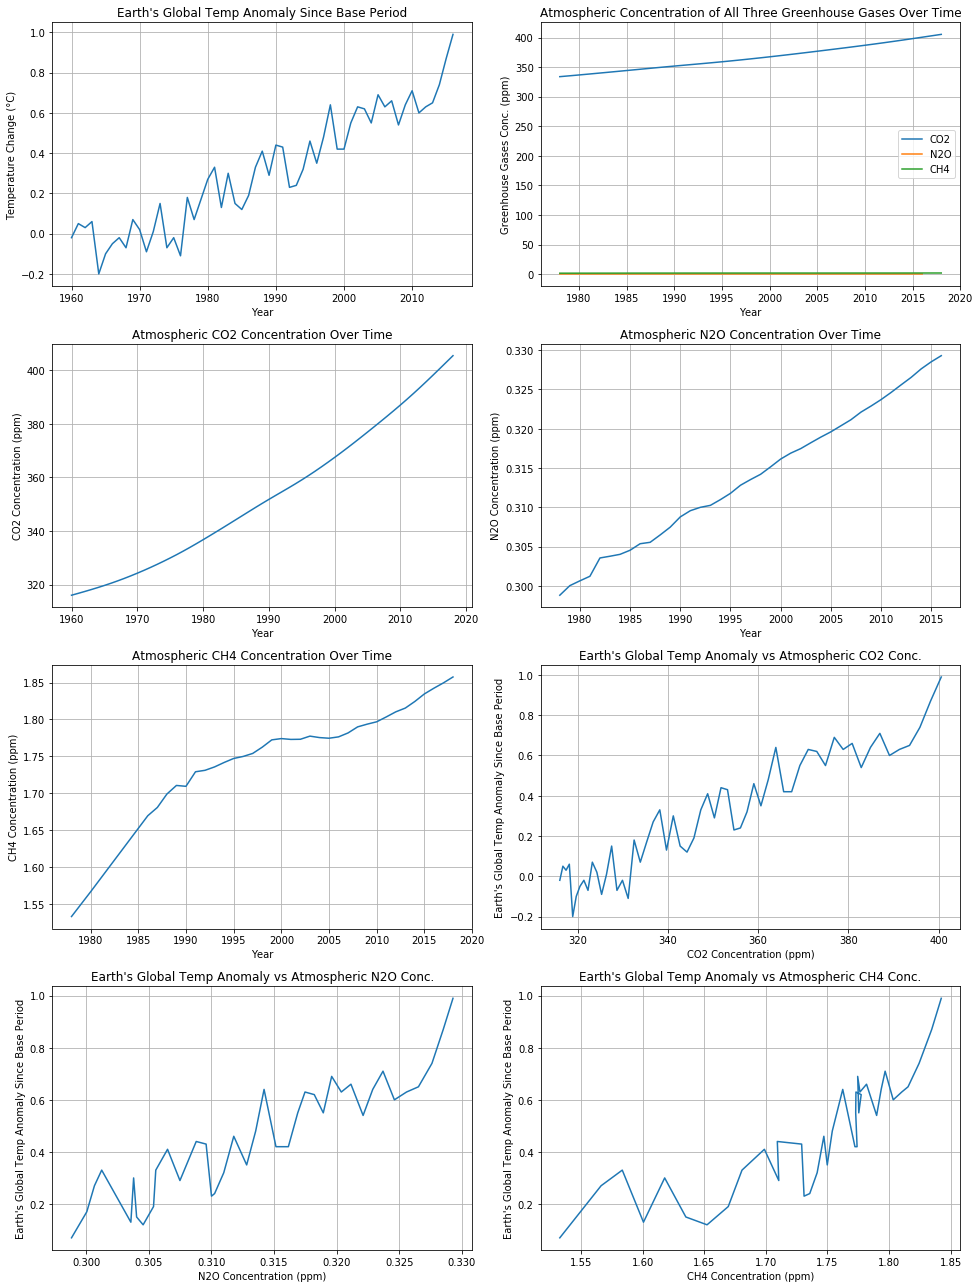

In [21]:
figure, axis = plt.subplots(4,2, figsize = (14,18)) #Creating subplots

axis[0,0].plot(climate_change_data.index,climate_change_data['Mean Temp Anomaly Since Base Period (°C)'])
axis[0,0].set_title("Earth's Global Temp Anomaly Since Base Period")
axis[0,0].set_xlabel('Year')
axis[0,0].set_ylabel('Temperature Change (°C)')
axis[0,0].grid()

axis[1,0].plot(climate_change_data.index,climate_change_data['Atmospheric CO2 Concentration (ppm)'])
axis[1,0].set_title('Atmospheric CO2 Concentration Over Time')
axis[1,0].set_xlabel('Year')
axis[1,0].set_ylabel('CO2 Concentration (ppm)')
axis[1,0].grid()

axis[1,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,2])
axis[1,1].set_title('Atmospheric N2O Concentration Over Time')
axis[1,1].set_xlabel('Year')
axis[1,1].set_ylabel('N2O Concentration (ppm)')
axis[1,1].grid()

axis[2,0].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,3])
axis[2,0].set_title('Atmospheric CH4 Concentration Over Time')
axis[2,0].set_xlabel('Year')
axis[2,0].set_ylabel('CH4 Concentration (ppm)')
axis[2,0].grid()

axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,1],label='CO2')
axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,2],label='N2O')
axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,3],label='CH4')
axis[0,1].set_title('Atmospheric Concentration of All Three Greenhouse Gases Over Time')
axis[0,1].set_xlabel('Year')
axis[0,1].set_ylabel('Greenhouse Gases Conc. (ppm)')
axis[0,1].legend()
axis[0,1].grid()

axis[2,1].plot(climate_change_data['Atmospheric CO2 Concentration (ppm)'],climate_change_data['Mean Temp Anomaly Since Base Period (°C)'])
axis[2,1].set_title("Earth's Global Temp Anomaly vs Atmospheric CO2 Conc.")
axis[2,1].set_xlabel('CO2 Concentration (ppm)')
axis[2,1].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[2,1].grid()

axis[3,0].plot(climate_change_data.iloc[18:,2],climate_change_data.iloc[18:,0])
axis[3,0].set_title("Earth's Global Temp Anomaly vs Atmospheric N2O Conc.")
axis[3,0].set_xlabel('N2O Concentration (ppm)')
axis[3,0].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[3,0].grid()

axis[3,1].plot(climate_change_data.iloc[18:,3],climate_change_data.iloc[18:,0])
axis[3,1].set_title("Earth's Global Temp Anomaly vs Atmospheric CH4 Conc.")
axis[3,1].set_xlabel('CH4 Concentration (ppm)')
axis[3,1].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[3,1].grid()

plt.tight_layout()

__Progress__

_After looking at my graphs, I first notice that Earth's global temperature is increasing at a significant rate. I also see that there is a positive correlation between greenhouse gas atmospheric concentrations and Earth's global temperature. This tells me that there is a serious issue going on with the rate at which the Earth has been heating up. There is also an issue with the rate at which we are pumping out greenhouse gases into the atmosphere. Not only is this bad for the globe, but increases in pollution can bring a series of issues when it comes to the health of the human polulation. Another thing that attracted my attention was the fact that Carbon Dioxide levels are significantly higher than the other two gases, whcih would lead me to assume that combatting Carbon Dioxide should be our main focus. It is easy to see how the Greenhouse Effect works after analyzing the plots. Increasing greenhouse gas concentrations leads to a thicker "blanket" that traps heat from the sun. This explains the correlations._

__Predicting the Future Temperature Anomaly__

_Now that I can clearly see correlations, I can now move on to my final question, what the does future of climate change look like? I need to make a regression line to do this. Even though my N2O and CH4 data will probably not contribute as greatly to my regression line as CO2, I think it is still important to include it as we are still responsible for all 3 gas emissions. To create my line, I need to make a regression line that uses multiple variables, one for each gas. I figured I would use 'curve_fit' for this._

In [24]:
#I need to start at 1978 because the data for N2O and CH4 begins to be continuous at the year
climate_change_newdata = climate_change_data.loc[1978:2016]

X = climate_change_newdata.drop(columns=['Mean Temp Anomaly Since Base Period (°C)','Year'])
v = climate_change_newdata['Mean Temp Anomaly Since Base Period (°C)']

def func(X, a, b, c, d):
    x,y,z = X
    return( a*x + b*y + c*z + d)

x = X['Atmospheric CO2 Concentration (ppm)']
y = X['Atmospheric N2O Concentration (ppm)']
z = X['Atmospheric CH4 Concentration (ppm)']

popt, pcov = curve_fit(func, (x,y,z), v)
A = popt[0]
B = popt[1]
C = popt[2]
D = popt[3]

print('The model parameters are',popt)

The model parameters are [ 0.01231122 -5.78163866  0.12018029 -2.41879208]


__My Regression Model:__

Temperature Anomaly = Our expected y value

A = 0.01231122  (coefficient for CO2 data)

B = -5.78163866 (coefficient for N2O data)

C = 0.12018029  (coefficient for CH4 data)

D = -2.41879208 (y-intercept)

_My Regression Model is_

__Temperature Anomaly = (A * CO2 Data) + (B * N2O Data) + (C * CH4 Data) + D__

which is

__Temperature Anomaly = (0.01231122 * CO2 Data) + (-5.78163866 * N2O Data) + (0.12018029 * CH4 Data) + (-2.41879208)__

_One thing to note is that based on the coefficients, Carbon Dioxide may be the most impactiful on climate change._

In [25]:
def temp_change(A,B,C,D): #Transforming my equation into code
    temp = (A*climate_change_newdata['Atmospheric CO2 Concentration (ppm)'])+ (B*climate_change_newdata['Atmospheric N2O Concentration (ppm)']) + (C*climate_change_newdata['Atmospheric CH4 Concentration (ppm)']) + D
    return(temp)

_Now that I have my best fit equation, I can make a regression line to find the initial trend in the in the global temperature anomaly over the years that already past. A 2nd degree polynomial should be sufficient for this._

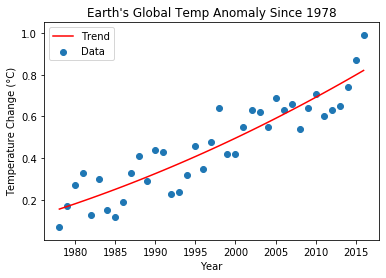

In [26]:
#Running my equation to get my expected y-value.
temperature_change = temp_change(A,B,C,D)
temperature_change = np.array(temperature_change)

t = temperature_change
y = climate_change_newdata['Year']
c = climate_change_newdata['Mean Temp Anomaly Since Base Period (°C)']
real_c = np.array(c)

parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c = poly_function(y)
plt.scatter(y, c, label = "Data")
plt.plot(y, expected_c, color = "red", label = "Trend")

plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

_Now that we have our best fit line, I am going to use it to model Earth's temperature anomaly up until 2050._

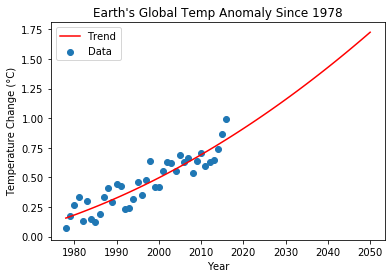

In [27]:
date1 = []
for i in y:
    date1.append(y[i])
i = 2016
count = 1
while count <= 34:
    i += 1
    date1.append(i)
    count += 1
y2 = date1

parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c2 = poly_function(y2)
plt.scatter(y, c, label = "Data")
plt.plot(y2, expected_c2, color = "red", label = "Trend")

plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

_Now I'll see the prediction for 2100._

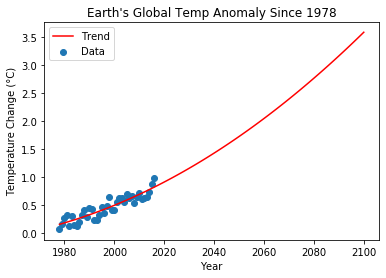

In [28]:
date2 = []
for i in y:
    date2.append(y[i])
i = 2016
count = 1
while count <= 84:
    i += 1
    date2.append(i)
    count += 1
y3 = date2

parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c3 = poly_function(y3)
plt.scatter(y, c, label = "Data")
plt.plot(y3, expected_c3, color = "red", label = "Trend")

plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

## Results

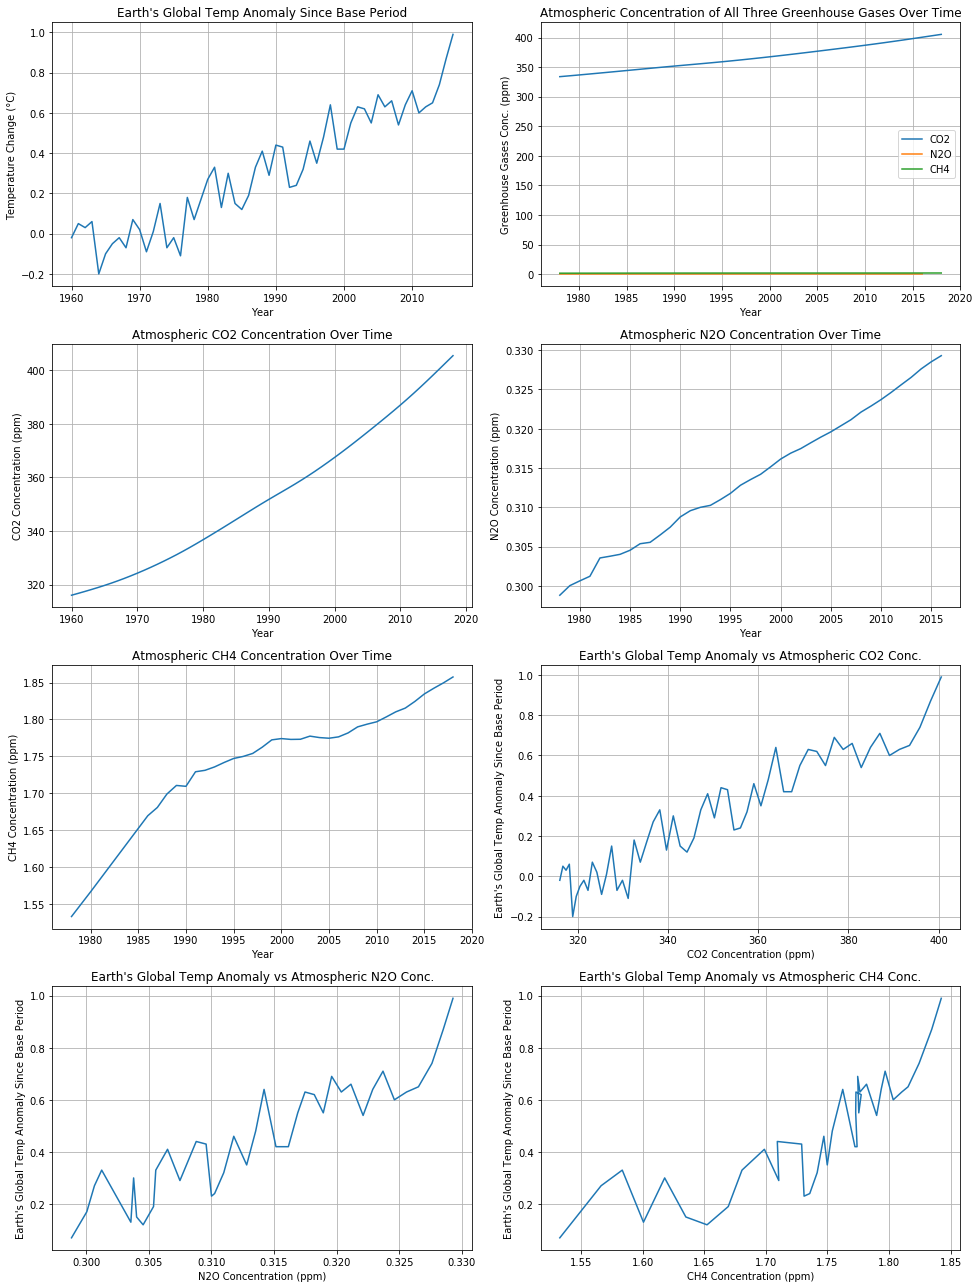

In [29]:
figure, axis = plt.subplots(4,2, figsize = (14,18))
axis[0,0].plot(climate_change_data.index,climate_change_data['Mean Temp Anomaly Since Base Period (°C)'])
axis[0,0].set_title("Earth's Global Temp Anomaly Since Base Period")
axis[0,0].set_xlabel('Year')
axis[0,0].set_ylabel('Temperature Change (°C)')
axis[0,0].grid()
axis[1,0].plot(climate_change_data.index,climate_change_data['Atmospheric CO2 Concentration (ppm)'])
axis[1,0].set_title('Atmospheric CO2 Concentration Over Time')
axis[1,0].set_xlabel('Year')
axis[1,0].set_ylabel('CO2 Concentration (ppm)')
axis[1,0].grid()
axis[1,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,2])
axis[1,1].set_title('Atmospheric N2O Concentration Over Time')
axis[1,1].set_xlabel('Year')
axis[1,1].set_ylabel('N2O Concentration (ppm)')
axis[1,1].grid()
axis[2,0].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,3])
axis[2,0].set_title('Atmospheric CH4 Concentration Over Time')
axis[2,0].set_xlabel('Year')
axis[2,0].set_ylabel('CH4 Concentration (ppm)')
axis[2,0].grid()
axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,1],label='CO2')
axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,2],label='N2O')
axis[0,1].plot(climate_change_data.iloc[18:,4],climate_change_data.iloc[18:,3],label='CH4')
axis[0,1].set_title('Atmospheric Concentration of All Three Greenhouse Gases Over Time')
axis[0,1].set_xlabel('Year')
axis[0,1].set_ylabel('Greenhouse Gases Conc. (ppm)')
axis[0,1].legend()
axis[0,1].grid()
axis[2,1].plot(climate_change_data['Atmospheric CO2 Concentration (ppm)'],climate_change_data['Mean Temp Anomaly Since Base Period (°C)'])
axis[2,1].set_title("Earth's Global Temp Anomaly vs Atmospheric CO2 Conc.")
axis[2,1].set_xlabel('CO2 Concentration (ppm)')
axis[2,1].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[2,1].grid()
axis[3,0].plot(climate_change_data.iloc[18:,2],climate_change_data.iloc[18:,0])
axis[3,0].set_title("Earth's Global Temp Anomaly vs Atmospheric N2O Conc.")
axis[3,0].set_xlabel('N2O Concentration (ppm)')
axis[3,0].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[3,0].grid()
axis[3,1].plot(climate_change_data.iloc[18:,3],climate_change_data.iloc[18:,0])
axis[3,1].set_title("Earth's Global Temp Anomaly vs Atmospheric CH4 Conc.")
axis[3,1].set_xlabel('CH4 Concentration (ppm)')
axis[3,1].set_ylabel("Earth's Global Temp Anomaly Since Base Period")
axis[3,1].grid()
plt.tight_layout()

__Temperature Anomaly = (0.01231122 * CO2 Data) + (-5.78163866 * N2O Data) + (0.12018029 * CH4 Data) + (-2.41879208)__

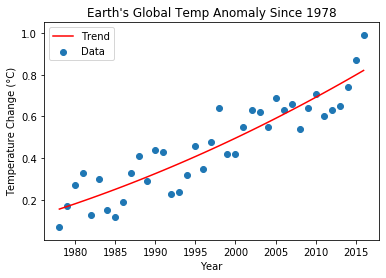

In [30]:
temperature_change = temp_change(A,B,C,D)
temperature_change = np.array(temperature_change)
t = temperature_change
y = climate_change_newdata['Year']
c = climate_change_newdata['Mean Temp Anomaly Since Base Period (°C)']
parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c = poly_function(y)
plt.scatter(y, c, label = "Data")
plt.plot(y, expected_c, color = "red", label = "Trend")
plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

In [31]:
print('In the year',y2[40],"the Earth's global temperature increased",round(expected_c2[40]-real_c[0],2),'degrees Celsius since 1978.')
print('That is',round(temp_convert(expected_c2[40])-temp_convert(real_c[0]),2),'degrees Fahrenheit warmer.')
print('The percent increase in temperature is ',round(((expected_c2[40]+real_c[0])/2),2)*100,'%.',sep='')

In the year 2018 the Earth's global temperature increased 0.8 degrees Celsius since 1978.
That is 1.43 degrees Fahrenheit warmer.
The percent increase in temperature is 47.0%.


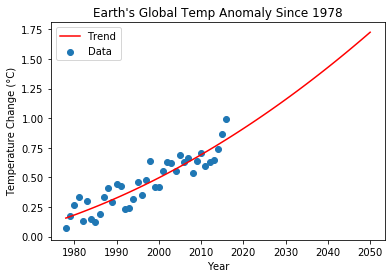

In [32]:
parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c2 = poly_function(y2)
plt.scatter(y, c, label = "Data")
plt.plot(y2, expected_c2, color = "red", label = "Trend")
plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

In [33]:
print('In the year',y2[72],"the Earth's global temperature will have increased",round(expected_c2[72]-real_c[0],2),'degrees Celsius since 1978.')
print('That is',round(temp_convert(expected_c2[72])-temp_convert(real_c[0]),2),'degrees Fahrenheit warmer.')
print('The percent increase in temperature is ',round(((expected_c2[72]+real_c[0])/2),2)*100,'%.',sep='')

In the year 2050 the Earth's global temperature will have increased 1.66 degrees Celsius since 1978.
That is 2.98 degrees Fahrenheit warmer.
The percent increase in temperature is 90.0%.


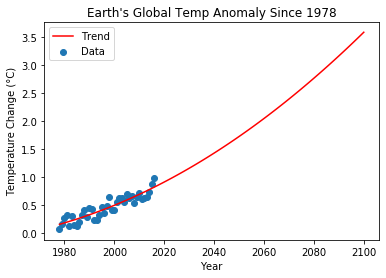

In [34]:
parameters = np.polyfit(y, t, 2)
poly_function = np.poly1d(parameters)
expected_c3 = poly_function(y3)
plt.scatter(y, c, label = "Data")
plt.plot(y3, expected_c3, color = "red", label = "Trend")
plt.title("Earth's Global Temp Anomaly Since 1978")
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()

In [35]:
print('In the year',y3[122],"the Earth's global temperature will have increased",round(expected_c3[122]-real_c[0],2),'degrees Celsius since 1978.')
print('That is',round(temp_convert(expected_c3[122])-temp_convert(real_c[0]),2),'degrees Fahrenheit warmer.')
print('The percent increase in temperature is ',round(((expected_c3[122]+real_c[0])/2),2)*100,'%.',sep='')

In the year 2100 the Earth's global temperature will have increased 3.52 degrees Celsius since 1978.
That is 6.33 degrees Fahrenheit warmer.
The percent increase in temperature is 183.0%.


## Discussion and Conclusion

_Based on my results, I found that the Earth's temperature will continue to increase at an alarming rate if we continue to allow the increase of greenhouse gas emissions at our current rate. According to my model, Earth's global temperature anomaly will be 1.66 degrees Celsius in 2050, which will be a 90% increase in temperature between 2050 and 1978. By 2100, the temperature anomaly will be as high as 3.52 degrees Celsius, which will be a 183% increase in temperature between 2100 and 1978. I also found that the concentration of carbon dioxide in the atmosphere is significantly higher than the other greenhouse gases that we are responsible for. Due to this, focusing on reducing carbon emissions seems to be the best hope for combating climate change._

_I experienced many obstacles. One was being able to make the multivariable regression model. An issue with the project is that more factors go into climate change than the 3 greenhouse gases that I modeled, which makes everything much more complicated. This is because more than just atmospheric concentrations of greenhouse gases cause the greenhouse effect, it also depends on the gas itself. For example, two different gases of the same concentration will trap different amounts of heat. If I took in all of these factors, the model would have been too complicated for me to create._

_Next time, I would try to add in more factors to my model. Since carbon dioxide concentrations are extremely high (400.585ppm in 2016, while at the same time nitrous oxide and methane were at 0.32929ppm and 1.84240ppm, respectively), I would try to see what activity causes the most carbon emissions. This would be very complicated, as I would have to go through the carbon emissions of every country, as well as the individual causes. For example, having to incorperate carbon emissions from cars in every country, then planes, then fossil fuels. So many factors make climate change a complicated issue, which is why it is such a highly debated topic today._

I am happy with the results of my model. My predicted temperature anomaly for 2018 was 0.8 degrees Celsius. After a quick google search, I found that NOAA (National Oceanic and Atmospheric Administration) found it to be 0.79 degrees Celsius while NASA's GISS (Goddard Institute for Space Studies) found it to be 0.83 degrees Celsius. As my model is rather simple, I am content that my model's value was that close to my researched values; however, I am dissapointed that the Earth has become that much warmer in as little as 40 years. This is why people are so concerned about the issue. After looking at my future predictions for 2050 and 2100, I can see that climate change may be the most important issue of the 21st century.

### References

__Global Temperature Anomaly Data:__

Datopian. “Global Temperature Time Series.” DataHub, datahub.io/core/global-temp#pandas.

__Carbon Dioxide, Nitrous Oxide, and Methane Data:__

Ritchie, Hannah, and Max Roser. “CO₂ and Greenhouse Gas Emissions.” Our World in Data, 11 May 2017, ourworldindata.org/co2-and-other-greenhouse-gas-emissions.

__NASA and NOAA Temperature Anomaly for 2018:__

“2018 Fourth Warmest Year in Continued Warming Trend, According to NASA, NOAA – Climate Change: Vital Signs of the Planet.” NASA, NASA, 23 July 2019, climate.nasa.gov/news/2841/2018-fourth-warmest-year-in-continued-warming-trend-according-to-nasa-noaa/.

__Code Citation:__

Erik Marsja. “Six Ways to Reverse Pandas Dataframe - Erik Marsja %.” Erik Marsja, 9 Sept. 2019, www.marsja.se/six-ways-to-reverse-pandas-dataframe/.